# Obejectives
- Different types of machine learing - supervised, unsupervised and reinforcement
- Machine learning steps
- Data preparation techniques for different kinds of models
- Use LogisticRegression and DecisionTreeClassifier to predict telecom Churn 
  - All the predictor variables should be numerical value
- Three ways to calculate Customer lifeteim value (CLV)
- Use LinearRegression model to predict next month's  transactions
- Measure model performance with mutiple metrics
- Segment customers based on their product purchse history
  - KMeans
  - NMF

## 1. explore the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/QXJ/Python/Datacamp/Marketing/ML/telco.csv'
telco_raw = pd.read_csv(path)
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_raw.shape

(7043, 21)

In [4]:
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# separate the identifier and target variable names as lists
custid = ['customerID']
target = ['Churn']

In [6]:
# separate categorical and numeric columns names as lists
telco_unique = telco_raw.nunique()
cat = telco_unique[telco_unique < 10].index.tolist()
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [7]:
# remove target var
cat.remove(target[0])
'Churn' in cat

False

In [80]:
numerical = [col for col in telco_raw.columns 
            if col not in cat + target + custid]
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [81]:
# convert str to float by removing empty str
telco = telco_raw[telco_raw['tenure'] != 0]
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [82]:
pd.to_numeric(telco['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

**One-hot coding**

In [83]:
telco = pd.get_dummies(data = telco, 
                       columns = cat,
                       drop_first = True)
telco.head(3)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


**Scaling numerical features**

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(telco[numerical])
scaled_numerical[:5]

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       [ 0.51248626, -0.74785042, -0.19524771],
       [-1.23950408,  0.19617818, -0.94045745]])

In [85]:
scaled_numerical = pd.DataFrame(scaled_numerical,
                                columns = numerical)
scaled_numerical.head(3)

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649


In [86]:
# merge numerical data with dummies data 
telco = telco.drop(columns = numerical, axis = 1)
telco.head(2)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
scaled_numerical.head(3)

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649


In [87]:
telco = telco.merge(scaled_numerical, 
           how = 'left',
           left_index = True,
           right_index = True)
telco = telco.dropna()

In [88]:
telco.head(3)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,Yes,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.239504,-0.363923,-0.959649


In [90]:
telco.to_csv('/QXJ/Python/Datacamp/Marketing/ML/telco_clean.csv')

## 2. Model the ML
- **Supervised learning**
    - Split data to training and testing 
    - Initialize the model
    - Fit the model on the training data 
    - Predict values on the testing data
    - Measure model performance on testing data
- **Unsupervised learning**
    - Initialize the model 
    - Fit the model
    - Assign cluster values 
    - Explore the clusters

### Decision Tree

### KMeans Cluster

## 3. Churn prediction
- DecisionTreeClassifier
- LogisticRegression
    - Statistical classification model for binary responses
    - Models log-odds of the probability of the target
    - Assumes linear relationship between log-odds target and predictors
    - It performs L2 regularization by default, which only manages over-fitting but does not perform feature selection
- Key metrics
    - **Accuracy** - the % of correctly predicted labels (both churn and non-churn)
    - **Precision** - the % of total model's positive class predictions (here - predicted as Churn) that were correclty classified
    - **Recall** - the % of total positive class samples (all churned customers) that were correclty classified
- Regularization
    - Introduces penalty coefficient in the model building phases
    - Addresses over-fitting (when patterns are "memorized by the model")
    - Some regularization techniques also perform feature selection e.g. L1 - **lasso**, which performs feature selection by schrinking some of the model coefficients to zero
    - Makes the model more generalizable to unseen sample

### LogisticRegression

**Explore churn distribution**

In [91]:
telco.groupby(['Churn']).size()/telco.shape[0]

Churn
No     0.734226
Yes    0.265774
dtype: float64

*if the minority class is less than 5% then we should worry and explore computational ways to increase the moniortiy class or decrease the majority class with oversampling or undersampling techniques*

In [93]:
X = telco.drop(['customerID', 'Churn'], axis = 1)
print(len(X))
X.head(2)

7021


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740


In [98]:
features = X
print(type(features))
X = X.to_numpy()
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [94]:
telco['Churn'] = telco['Churn'].map({
    'No': False,
    'Yes': True
})

telco['Churn'].shape

(7021,)

In [95]:
telco['Churn'].unique()

array([False,  True])

In [96]:
y = telco['Churn']
y

0       False
1       False
2        True
3       False
4        True
        ...  
7027    False
7028    False
7029    False
7030    False
7031    False
Name: Churn, Length: 7021, dtype: bool

In [99]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                   random_state = 1)

In [100]:
features.columns

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

**LogisticRegression**

In [101]:
from sklearn.linear_model import LogisticRegression
# initialize 
logreg = LogisticRegression()
# fit the model 
logreg.fit(train_X, train_y)

LogisticRegression()

In [102]:
from sklearn.metrics import accuracy_score

# predict 
pred_train_y = logreg.predict(train_X)
pred_test_y = logreg.predict(test_X)

In [103]:
# evaluate
train_accuracy = accuracy_score(train_y, pred_train_y)
test_accuracy = accuracy_score(test_y, pred_test_y)
print('Training accuracy:', round(train_accuracy,4))
print('Testing accuracy:', round(test_accuracy,4))

Training accuracy: 0.784
Testing accuracy: 0.799


In [104]:
from sklearn.metrics import precision_score, recall_score
train_precision = round(precision_score(train_y, pred_train_y),4)
test_precision = round(precision_score(test_y, pred_test_y),4)
train_recall = round(recall_score(train_y, pred_train_y),4)
test_recall = round(recall_score(test_y, pred_test_y),4)

print('train_precision: {}, train_recall:{}'. format(train_precision, train_recall))
print('test_precision:{}, test_recall:{}'. format(test_precision, test_recall))

train_precision: 0.6137, train_recall:0.51
test_precision:0.6398, test_recall:0.5474


*Both precision and recall scrore are lower than the whole accuracy score which means the model predicts monority churn less accurately than the majority non churn class*

**Logistic regression coefficient**
- Logistic regression returns beta coefficients
- can be interpreted as change in log-odds of churn associated with 1 unit increase in the future

In [58]:
# extract coefficient 
logreg.coef_

array([[ 0.00000000e+00,  0.00000000e+00, -2.19700620e-01,
        -7.46209584e-02, -1.39801647e-01,  0.00000000e+00,
         0.00000000e+00,  6.02299163e-01, -3.68178139e-02,
        -1.11716340e-02, -4.92322268e-01, -9.10689333e-03,
        -2.10525066e-01, -2.02246413e-03,  0.00000000e+00,
        -2.27864412e-03, -2.58828474e-01, -1.66913542e-04,
         0.00000000e+00, -6.52700975e-01,  0.00000000e+00,
        -9.71432054e-01, -1.58868799e+00,  5.31969633e-02,
         0.00000000e+00,  4.41502099e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [106]:
# transforming logistic regression coefficients 
coefficients = pd.concat([pd.DataFrame(features.columns),
                        pd.DataFrame(np.transpose(logreg.coef_))],
                       axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients

,Feature,Coefficient
0,gender_Male,-0.028246
1,SeniorCitizen_1,0.070366
2,Partner_Yes,-0.248706
3,Dependents_Yes,-0.123071
4,PhoneService_Yes,-0.174752
5,MultipleLines_No phone service,0.174047
6,MultipleLines_Yes,0.003721
7,InternetService_Fiber optic,0.766177
8,InternetService_No,-0.142753
9,OnlineSecurity_No internet service,-0.142753


In [107]:
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient'] != 0]
print(coefficients.sort_values(by = ['Coefficient']))

                                  Feature  Coefficient  Exp_Coefficient
22                      Contract_Two year    -2.190207         0.111894
21                      Contract_One year    -1.208940         0.298513
10                     OnlineSecurity_Yes    -0.505129         0.603428
12                       OnlineBackup_Yes    -0.383488         0.681480
16                        TechSupport_Yes    -0.377480         0.685587
2                             Partner_Yes    -0.248706         0.779809
14                   DeviceProtection_Yes    -0.211304         0.809528
4                        PhoneService_Yes    -0.174752         0.839665
19    StreamingMovies_No internet service    -0.142753         0.866968
17        StreamingTV_No internet service    -0.142753         0.866968
8                      InternetService_No    -0.142753         0.866968
9      OnlineSecurity_No internet service    -0.142753         0.866968
11       OnlineBackup_No internet service    -0.142753         0

**L1 regularization and feature selection**

In [29]:
# C value is the inverse of the regularization strength
logreg = LogisticRegression(penalty = 'l1',
                            C = 0.1,
                           solver = 'liblinear')
logreg.fit(train_X, train_y)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

*- **C** parameter needs to be tuned to find the optimal value*

In [30]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
l1_metrics

array([[1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.5  , 0.   , 0.   , 0.   , 0.   ],
       [0.25 , 0.   , 0.   , 0.   , 0.   ],
       [0.1  , 0.   , 0.   , 0.   , 0.   ],
       [0.05 , 0.   , 0.   , 0.   , 0.   ],
       [0.025, 0.   , 0.   , 0.   , 0.   ]])

In [31]:
for index in range(0, len(C)):
    logreg = LogisticRegression(penalty = 'l1',
                               C = C[index],
                               solver = 'liblinear')
    logreg.fit(train_X, train_y)
    pred_test_y = logreg.predict(test_X)
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = accuracy_score(test_y, pred_test_y)
    l1_metrics[index,3] = precision_score(test_y, pred_test_y)
    l1_metrics[index,4] = recall_score(test_y, pred_test_y)

col_names = ['C', 'Non_zero', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(l1_metrics, columns = col_names))

       C  Non_zero  Accuracy  Precision    Recall
0  1.000      28.0  0.800114   0.642317  0.549569
1  0.500      29.0  0.800114   0.642317  0.549569
2  0.250      30.0  0.799544   0.642132  0.545259
3  0.100      27.0  0.800114   0.645995  0.538793
4  0.050      24.0  0.797267   0.648352  0.508621
5  0.025      15.0  0.794419   0.661442  0.454741


*The decision on which C value to choose depends on the cost of declining precision and / or recall*: **the best is C = 0.1**

**Alternative: LogisticRegression**

In [46]:
telcom = pd.read_csv('/QXJ/Python/Datacamp/Marketing/ML/telco_clean.csv',
                    index_col = 0)
telcom = telcom.dropna()
telcom.head(3)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,Yes,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.239504,-0.363923,-0.959649


In [47]:
telcom.shape

(7021, 32)

In [48]:
# Print the unique Churn values
telcom['Churn'] = telcom['Churn'].map({
    'Yes': True,
    'No': False
})
print(set(telcom['Churn']))

# Calculate the ratio size of each churn group
telcom.groupby(['Churn']).size() / telcom.shape[0] * 100

# Import the function for splitting data to train and test
from sklearn.model_selection import train_test_split

# Split the data into train and test
train, test = train_test_split(telcom, test_size = .25)

{False, True}


In [49]:
# Store column names from `telcom` excluding target variable and customer ID
cols = [col for col in telcom.columns if col not in custid + target]

# Extract training features
train_X = train[cols]

# Extract training target
train_Y = train[target].to_numpy().flatten()

# Extract testing features
test_X = test[cols]

# Extract testing target
test_Y = test[target].to_numpy().flatten()

In [50]:
train_Y.shape

(5265,)

In [51]:
logreg = LogisticRegression()
# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7813


In [52]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.7728


In [57]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.7728


In [54]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.zeros((len(C),3))
l1_metrics[:,0] = C
l1_metrics

# Run a for loop over the range of C list length
for index in range(0, len(C)):
  # Initialize and fit Logistic Regression with the C candidate
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X, train_Y)
  # Predict churn on the testing data
    pred_test_Y = logreg.predict(test_X)
  # Create non-zero count and recall score columns
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs    Recall
0  1.0000             29.0  0.489627
1  0.5000             26.0  0.487552
2  0.2500             25.0  0.487552
3  0.1000             25.0  0.485477
4  0.0500             22.0  0.450207
5  0.0250             16.0  0.412863
6  0.0100              9.0  0.234440
7  0.0050              7.0  0.000000
8  0.0025              0.0  0.000000


### Decision Tree

In [108]:
from sklearn.model_selection import train_test_split
# Split data to the training and testing 
train_X, test_X, train_y, test_y = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [109]:
from sklearn.tree import DecisionTreeClassifier
# initialize the model 
mytree = DecisionTreeClassifier()
# fit the model on the train data
mytree.fit(train_X, train_y)
# predict values on the testing data
pred_train_y = mytree.predict(train_X)
pred_test_y = mytree.predict(test_X)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# measure model performance on testing data
train_accuracy = accuracy_score(train_y, pred_train_y)
test_accuracy = accuracy_score(test_y, pred_test_y)
print('Training accuracy: {}'.format(train_accuracy))
print('Test accuracy: {}'.format(test_accuracy))

Training accuracy: 0.9998219373219374
Test accuracy: 0.696085409252669


In [111]:
train_precision = round(precision_score(train_y,
                                       pred_train_y),4)
test_precision = round(precision_score(test_y,
                                      pred_test_y),4)
train_recall = round(recall_score(train_y,
                                 pred_train_y),4)
test_recall = round(recall_score(test_y,
                                pred_test_y),4)
print('Training precision: {}, training recall: {}'.format(train_precision,
                                                          train_recall))
print('Test precision: {}, test recall: {}'.format(test_precision,
                                                  test_recall))

Training precision: 1.0, training recall: 0.9993
Test precision: 0.4282, test recall: 0.4501


**Visualize the decision tree**

In [39]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/QXJ/anaconda3/Lib/site-packages/Graphviz/bin/'

In [112]:
from sklearn import tree
import graphviz

exported = tree.export_graphviz(
decision_tree = mytree,
out_file = None,
precision = 1,
feature_names = features.columns,
class_names = ['Not churn', 'Churn'],
filled = True)

graph = graphviz.Source(exported)
display(graph)

In [113]:
fie_ext = 'png'
temp_img = 'mytree_churn'
graph.render(temp_img, format=fie_ext, view=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.545471 to fit


'mytree_churn.png'

*The decisionTreeClassifer is prone to be overfitting -> solution: prune the tree by limiting the number of if-else rules*

In [114]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0] = depth_list
depth_tuning

array([[ 2.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       [11.,  0.,  0.,  0.],
       [12.,  0.,  0.,  0.],
       [13.,  0.,  0.,  0.],
       [14.,  0.,  0.,  0.]])

In [115]:
from sklearn.tree import DecisionTreeClassifier

for index in range(len(depth_list)):
    mytree = DecisionTreeClassifier(max_depth = depth_list[index])
    mytree.fit(train_X, train_y)
    pred_test_y = mytree.predict(test_X)
    depth_tuning[index,1] = accuracy_score(test_y, pred_test_y)
    depth_tuning[index,2] = precision_score(test_y, pred_test_y)
    depth_tuning[index,3] = recall_score(test_y, pred_test_y)
    
col_names = ['Max_depth', 
             'Accuracy_score',
             'Precision_score',
            'Recall_score']
print(pd.DataFrame(depth_tuning, columns = col_names))

    Max_depth  Accuracy_score  Precision_score  Recall_score
0         2.0        0.735943         0.000000      0.000000
1         3.0        0.759431         0.536913      0.646900
2         4.0        0.780071         0.583784      0.582210
3         5.0        0.782918         0.626923      0.439353
4         6.0        0.780071         0.622047      0.425876
5         7.0        0.764413         0.579365      0.393531
6         8.0        0.758007         0.554770      0.423181
7         9.0        0.755872         0.536269      0.557951
8        10.0        0.751601         0.537931      0.420485
9        11.0        0.731673         0.490385      0.412399
10       12.0        0.735231         0.498423      0.425876
11       13.0        0.724555         0.476190      0.431267
12       14.0        0.716014         0.465686      0.512129


C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_x', 'MonthlyCharges_x', 'TotalCharges_x', 'tenure_y',
       'MonthlyCharges_y', 'TotalCharges_y'],
      dtype='object')

## 3. Customer Lifetime Value (CLV)

<br>

*How much company expects to earn from an average customer in a lifetime*

- Historical or predicated
- Multiple approach, denpends on business type, complex models such as Pareto/NBD
- Some methods are fomula-based, some are predictive and distribution based 

### 1. Historical CLV
- Historical CLV = (Revenue 1 + Revenue 2 + ... + Revenue N) * Profit Margin
- Alternatively - sum profit of all past transactions, if availabe
- Challenge 1: does not count for tenure, retention and churn rate 
- Challenge 2: dose not count for new customers and their future revenue


### 2. CLV formula
**Basic CLV formula**
- CLV = average revenue * profit margin * average lifespan
**Granular CLV formula**
- CLV = (avg. revenue per purchase * avg. frequency * profit margin) * avg.lifetime
**Traditional CLV formula**
- CLV = (avg. revenue * Profit margin)  * (Retention rate/churn rate)

In [120]:
cohort_counts = pd.read_csv('/QXJ/Python/Datacamp/Marketing/customer_segment/chapter_1/cohort_counts.csv')
cohort_counts

,CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
1,2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2,2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
3,2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
4,2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
5,2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,279.0,56.0,78.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
cohort_counts = cohort_counts.set_index('CohortMonth')

In [131]:
# Use first month values to calculate cohort sizes
cohort_size = cohort_counts.iloc[:,0]
cohort_size

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64

In [132]:
# calculate retention by dividing monthly active users by their initial sizes
# derive churn values
retention = cohort_counts.divide(cohort_size, axis = 0)
print(retention)
churn = 1 - retention 
print(churn)

               1         2         3         4         5         6         7  \
CohortMonth                                                                    
2010-12-01   1.0  0.343575  0.308659  0.350559  0.342179  0.398045  0.347765   
2011-01-01   1.0  0.207831  0.246988  0.243976  0.331325  0.271084  0.246988   
2011-02-01   1.0  0.183544  0.180380  0.262658  0.268987  0.234177  0.253165   
2011-03-01   1.0  0.162371  0.257732  0.195876  0.213918  0.172680  0.252577   
2011-04-01   1.0  0.192157  0.203922  0.192157  0.184314  0.203922  0.219608   
2011-05-01   1.0  0.160643  0.172691  0.144578  0.208835  0.232932  0.244980   
2011-06-01   1.0  0.159420  0.125604  0.198068  0.236715  0.299517  0.091787   
2011-07-01   1.0  0.161850  0.179191  0.219653  0.254335  0.098266       NaN   
2011-08-01   1.0  0.215827  0.201439  0.251799  0.100719       NaN       NaN   
2011-09-01   1.0  0.200717  0.279570  0.121864       NaN       NaN       NaN   
2011-10-01   1.0  0.210692  0.094340    

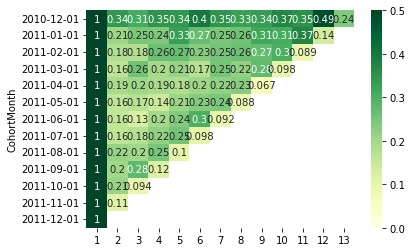

In [137]:
sns.heatmap(retention, 
            annot = True,
            vmin = 0,
            vmax = 0.5,
           cmap = 'YlGn')
plt.show()

In [142]:
# use the .mean() method twice in a row ("chaining") to calculate the overall mean.
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


In [141]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean()
retention_rate

2     0.192383
3     0.204592
4     0.218119
5     0.237925
6     0.238828
7     0.236696
8     0.231684
9     0.252608
10    0.268978
11    0.272283
12    0.310788
13    0.240223
dtype: float64

### 3. Calculate CLV
- The goal of CLV
- measure customer value in revenue / profit
- Benchmark customers
- identify maximum investment into customer acquisition


**CLV = avg.revenue * (retention rate/churn rate)**

In [8]:
online = pd.read_csv('/QXJ/Python/Datacamp/Marketing/customer_segment/chapter_1/online.csv',
                    index_col = 0,
                    parse_dates =['InvoiceDate'])
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50


In [9]:
from datetime import datetime
online['InvoiceMonth'] = online['InvoiceDate'].dt.strftime('%Y-%m')
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60,2011-10
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45,2011-11
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50,2011-07


In [198]:
online.to_csv('/QXJ/Python/Datacamp/Marketing/customer_segment/chapter_1/online_2.csv')

In [232]:
# calculate average monthly spend 
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])\
['TotalAmount'].sum().mean()
monthly_revenue

132.6264517374513

In [164]:
# define lifespan to 36 months
lifespan_months = 36

# calculate basic CLV
clv_basic = monthly_revenue * lifespan_months
print('Average basic CLV is {:.1f}'.format(clv_basic))

Average basic CLV is 4774.6


**Granular CLV calculation**

In [178]:
# calculate average revenue per invoice
revenue_per_purchase = online.groupby(['InvoiceNo'])\
['TotalAmount'].mean().mean()
revenue_per_purchase

34.8061233010237

In [179]:
# calculate average number of unique invoices per customer per month
freq = online.groupby(['CustomerID', 'InvoiceMonth'])\
['InvoiceNo'].nunique().mean()
freq

1.305019305019305

In [180]:
# define lifespan to 36 months
lifespan_months = 36

# calculate granular clv
clv_granular = revenue_per_purchase * freq * lifespan_months
print('Average granular clv is {:.1f} USD'.format(clv_granular))

Average granular clv is 1635.2 USD


**Traditional CLV calculation**

In [181]:
# calculate average monthly spend 
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])\
['TotalAmount'].sum().mean()
monthly_revenue

132.6264517374513

In [193]:
# calculate average monthly retention rate
retention_rate = retention.iloc[:,1:].mean().mean()
print(round(retention_rate * 100, 2), '%')

24.21 %


In [194]:
# calculate average monthly churn rate
churn_rate = 1 - retention_rate
print(round(churn_rate * 100, 2), '%')

75.79 %


In [196]:
# calculate traditional clv 
clv_traditional = monthly_revenue * (retention_rate/churn_rate)
print('Average traditonal CLV is {:.1f} USD at {:.2f} % retention rate'\
.format(clv_traditional, retention_rate * 100))

Average traditonal CLV is 42.4 USD at 24.21 % retention rate


**Data preparation for purchase prediction by using linear regression**
- Target variable must be continuous or count variable
- Linear regression: RFM 
- Count data(e.g. number of days active) sometimes better predicted by Poisson or negative binomial regression 

In [10]:
# explore monthly distribution of observations
online.groupby(['InvoiceMonth']).size()

InvoiceMonth
2010-12     4893
2011-01     3580
2011-02     3648
2011-03     4764
2011-04     4148
2011-05     5018
2011-06     4669
2011-07     4610
2011-08     4744
2011-09     7189
2011-10     8808
2011-11    11644
2011-12     3149
dtype: int64

In [226]:
online['CustomerID'].nunique()

3701

In [12]:
# exclude target variable 
online_X  = online[online['InvoiceMonth'] != '2011-12']
online_X['InvoiceMonth'].unique()

array(['2011-10', '2011-11', '2011-07', '2011-05', '2011-03', '2011-06',
       '2011-09', '2011-08', '2011-02', '2010-12', '2011-01', '2011-04'],
      dtype=object)

In [13]:
online_X['CustomerID'].nunique()

3663

In [14]:
online_y = online[online['InvoiceMonth'] == '2011-12']
online_y['InvoiceMonth'].unique()

array(['2011-12'], dtype=object)

In [16]:
online_y.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth
46,581164,21901,"KEY FOB , BACK DOOR",5,2011-12-07 14:34:00,0.65,14395,United Kingdom,3.25,2011-12
78,581450,22721,SET OF 3 CAKE TINS SKETCHBOOK,5,2011-12-08 17:54:00,1.95,16794,United Kingdom,9.75,2011-12


In [15]:
online_y.shape

(3149, 10)

In [ ]:
oneline_y.groupby('CustomerID')

In [19]:
Dec = online_X[ ~ online_X['CustomerID'].isin(online_y['CustomerID'])]
Dec['CustomerID'].unique()

array([14286, 13933, 17663, ..., 15368, 17855, 16698], dtype=int64)

In [20]:
import datetime as dt
# define snapshot date 
current = dt.datetime(2011,11,1)
current

datetime.datetime(2011, 11, 1, 0, 0)

In [21]:
# build the features
features = online_X.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum',
    'Quantity': ['mean', 'sum']
})

features.shape

(3663, 5)

In [22]:
features.head(3)

InvoiceDate InvoiceNo TotalAmount   Quantity      
              <lambda>   nunique         sum       mean   sum
CustomerID                                                   
12747              -17        10      690.52  10.000000   230
12748              -29       148     7309.26   6.086188  5508
12749              -17         3      725.85   7.718750   247

In [25]:
features.columns = ['Recency', 'Frequency',
                   'Monetary', 'Quantity_avg', 'Quantity_tot']
features.head(2)

,Recency,Frequency,Monetary,Quantity_avg,Quantity_tot
CustomerID,,,,,
12747,-17,10,690.52,10.000000,230
12748,-29,148,7309.26,6.086188,5508


In [26]:
# build pivot table with monthly transactions per customer 
cust_month_tx = pd.pivot_table(data = online, 
                              index = ['CustomerID'],
                              values = 'InvoiceNo',
                              columns = ['InvoiceMonth'],
                              aggfunc = pd.Series.nunique,
                              fill_value = 0)
cust_month_tx.shape

(3701, 13)

In [27]:
cust_month_tx.head(2)

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12747,2,1,0,1,0,2,1,0,1,0,1,1,1
12748,24,2,4,9,3,17,12,8,9,9,10,41,8


In [249]:
cust_month_tx['2011-12'].unique()

array([1, 8, 0, 2, 3, 4], dtype=int64)

In [32]:
merged = features.merge(cust_month_tx, 
                how = 'left', 
                left_index = True,
                right_index = True)
merged.tail()

,Recency,Frequency,Monetary,Quantity_avg,Quantity_tot,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,,,,,,
18277,19,1,48.78,13.500000,54,0,0,0,0,0,0,0,0,0,0,1,0,0
18280,238,1,38.70,3.500000,7,0,0,0,1,0,0,0,0,0,0,0,0,0
18281,141,1,31.80,8.000000,16,0,0,0,0,0,0,1,0,0,0,0,0,0
18283,-30,14,378.18,1.862319,257,0,2,1,0,1,1,2,1,0,1,1,4,1
18287,3,3,395.76,24.800000,372,0,0,0,0,0,1,0,0,0,0,2,0,0


In [33]:
merged.isna().sum()

Recency         0
Frequency       0
Monetary        0
Quantity_avg    0
Quantity_tot    0
2010-12         0
2011-01         0
2011-02         0
2011-03         0
2011-04         0
2011-05         0
2011-06         0
2011-07         0
2011-08         0
2011-09         0
2011-10         0
2011-11         0
2011-12         0
dtype: int64

In [34]:
merged.shape

(3663, 18)

In [55]:
merged.reset_index
merged.to_csv('/QXJ/Python/Datacamp/Marketing/ML/online_merged.csv')
merged

,Recency,Frequency,Monetary,Quantity_avg,Quantity_tot,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,,,,,,
12747,-17,10,690.52,10.000000,230,2,1,0,1,0,2,1,0,1,0,1,1,1
12748,-29,148,7309.26,6.086188,5508,24,2,4,9,3,17,12,8,9,9,10,41,8
12749,-17,3,725.85,7.718750,247,0,0,0,0,0,1,0,0,1,0,0,1,1
12820,5,3,202.62,10.307692,134,0,1,0,0,0,0,0,0,0,1,1,0,1
12822,31,2,146.15,9.666667,87,0,0,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,19,1,48.78,13.500000,54,0,0,0,0,0,0,0,0,0,0,1,0,0
18280,238,1,38.70,3.500000,7,0,0,0,1,0,0,0,0,0,0,0,0,0
18281,141,1,31.80,8.000000,16,0,0,0,0,0,0,1,0,0,0,0,0,0


*.**Lagged feautre**: they are the same metric as the target variable, but are recorded prior to the event to be predicted*
- Try including these lagged monthly features on the top of the RFM ones, would improve the model performance. 

In [41]:
# store identifier and target variable column names
target = ['2011-12']
predictor = ['Recency', 'Frequency', 'Monetary', 'Quantity_avg', 'Quantity_tot']

# extract target variable 
y = merged[target]

# store features
X = merged[predictor]

X.head(2)

,Recency,Frequency,Monetary,Quantity_avg,Quantity_tot
CustomerID,,,,,
12747,-17,10,690.52,10.000000,230
12748,-29,148,7309.26,6.086188,5508


In [42]:
y.head(2)

,2011-12
CustomerID,
12747,1
12748,8


*The features-table dose not include the new clients in Dec, so the unique cusotmer rows are shorter then y-table, thus it cannot be performed the linear regresson model*

In [266]:
# extract the rows in y but not in features
df = y[ ~ y.index.isin(features.index)]
df

InvoiceMonth,2011-12
CustomerID,
13153,1
13436,1
13560,1
13790,1
14087,1
14204,1
14219,1
14520,1
14569,1


In [43]:
# randomly split 25% of the data to testing 
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size = 0.25,
                                                   random_state = 1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2747, 5) (2747, 1) (916, 5) (916, 1)


### Use linear regression to predict next month's transaction
- **Root mean squared error (RMSE)**: square root of the average squared difference between prediction and actuals
- **Mean absolute error (MAE)** : average absolute difference prediction and actuals 
- **Mean absolute percentage error (MAPE)**: average percentage difference between prediction and actuals (acutals cannot be zeros) - the actual target values to be higher than 0 to not get into division by zero error
- **Additional regression and supervised learning metrics**
    - **R-squared**: statistical measure that represents the percentage proportion of variacne that is explained by the model. (**only applicable to regression, not classification. - Higher is better**)
    - **Coefficient p-value**: probability that the regression (or classification) coefficient is observed due to chance. **Lower is better**. Typically thresholds are 5% to 10%

In [53]:
# initialize the model 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model on the training dataset
linreg.fit(train_X, train_y)

# predict valuse on the testing dataset
train_pred_y = linreg.predict(train_X)
test_pred_y = linreg.predict(test_X)

# measure model performance on testing dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse_train = np.sqrt(mean_squared_error(train_y, train_pred_y))
mae_train = mean_absolute_error(train_y, train_pred_y)
rmse_test = np.sqrt(mean_squared_error(test_y, test_pred_y))
mae_test = mean_absolute_error(test_y, test_pred_y)

print('RMSE train: {:.3f}, RMSE test: {:,.3f}\nMAE train: {:.3f}, MAE test: {:.3f}'\
      .format(rmse_train, rmse_test, mae_train, mae_test))
# mae is less sentitive to the outliers

RMSE train: 0.381, RMSE test: 0.369
MAE train: 0.214, MAE test: 0.214


**interpreting coefficients**

In [54]:
# import the library
import statsmodels.api as sm

# convert target variable to numpy array
train_y = train_y.to_numpy()

# initialize and fit the model
# enter the training data in the model initialize step, not the fit step
olsreg = sm.OLS(train_y, train_X)
olsreg = olsreg.fit()

# print the model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              279.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                   9.16e-242
Time:                        08:34:53   Log-Likelihood:                         -1247.9
No. Observations:                2747   AIC:                                      2506.
Df Residuals:                    2742   BIC:                                      2535.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

***Interpretation:***
- *The important metrics are R-squared and P-value*
- *The coefficients*

## 4. Customer segmentation
- Unsupervised learning models
    - Hierarchical clustering
    - K-means (simple and popular)
    - Non-negative matrix factorization(NMF): broadly used in product recommendation engines, audio process, computer vision and even astronomy
    - Biclustering
    - Gaussian mixture models (GMM)
    - And many more
- Unsupervised learning steps
    - Initialize the model
    - Fit the model
    - Assign cluster values
    - Explore results

### Exploring the data

In [58]:
# customer by product / service matrix
path = '/QXJ/Python/Datacamp/Marketing/ML/wholesale_customers.csv'
wholesale_customers = pd.read_csv(path)
wholesale_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
wholesale = wholesale_customers.drop(['Channel', 'Region'],
                                    axis = 1)
wholesale.to_csv('/QXJ/Python/Datacamp/Marketing/ML/wholesale.csv')
wholesale.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [64]:
stats = wholesale.agg(['mean','std']).round(2)
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11


In [80]:
stats = pd.DataFrame(stats)
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11


In [126]:
stats.iloc[0]

Fresh               12000.30
Milk                 5796.27
Grocery              7951.28
Frozen               3071.93
Detergents_Paper     2881.49
Delicassen           1524.87
Name: mean, dtype: float64

In [127]:
stats.iloc[1]

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicassen           2820.11
Name: std, dtype: float64

In [125]:
stats.shape
# 2 rows * 6 columns 

(2, 6)

In [124]:
stats.shape[1]

6

In [122]:
x_ix = np.arange(stats.shape[1])
x_ix

array([0, 1, 2, 3, 4, 5])

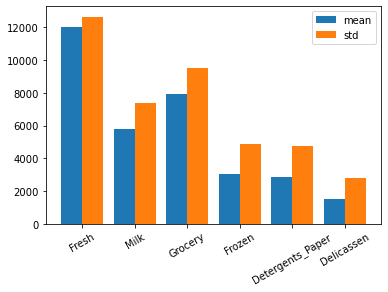

In [123]:
# x and y should have same shape
plt.bar(x_ix - 0.2, stats.iloc[0], label ='mean', width = 0.4)
plt.bar(x_ix + 0.2, stats.iloc[1], label = 'std', width = 0.4)
plt.xticks(x_ix, stats.columns, rotation = 30)
plt.legend()
plt.show()

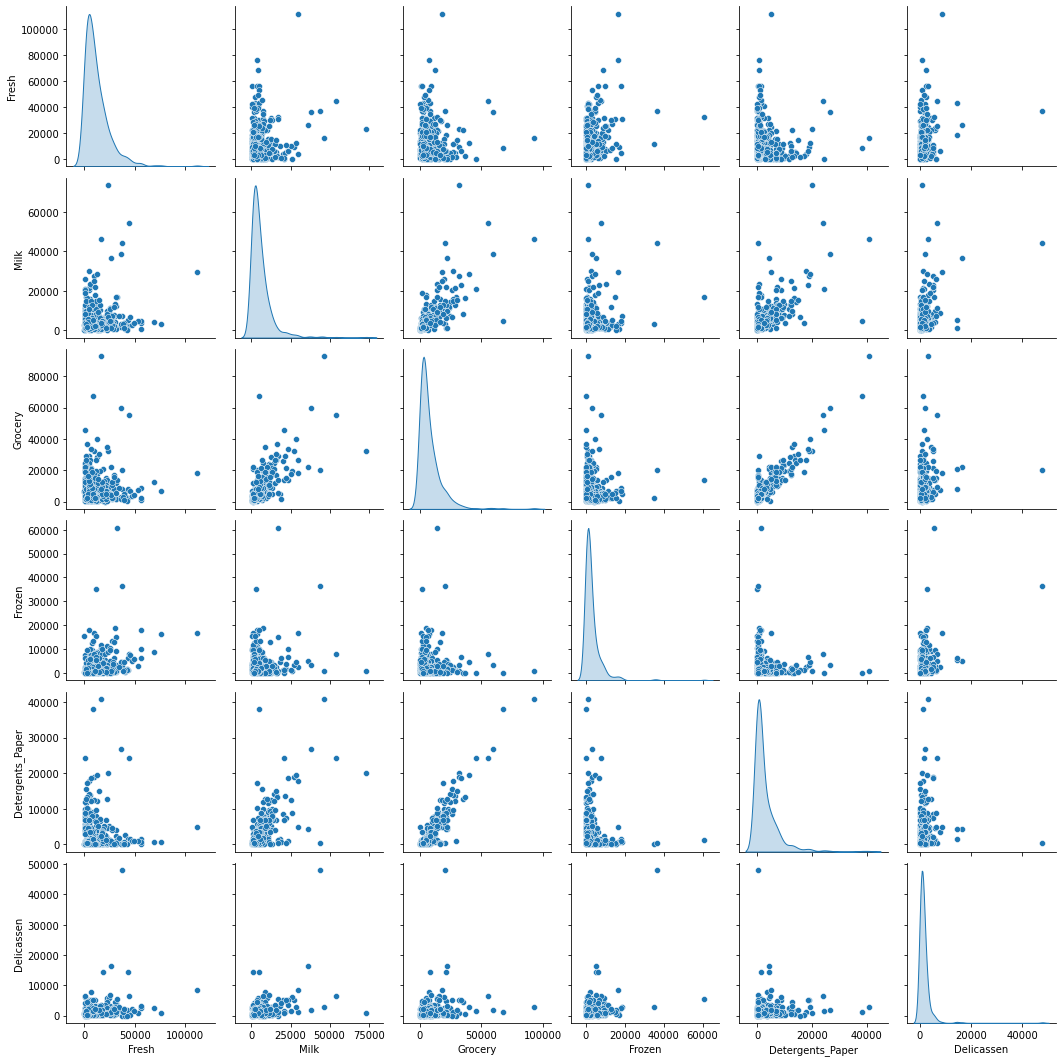

In [129]:
# visualize pairwise plot to explore distribution
sns.pairplot(wholesale, diag_kind = 'kde')
plt.show()
# highly skewed which means are not normally distributed

### Data preparation for segmentation
#### Model assumptions
- K-means 
    - data is normally distributed (no skew)
    - standardized (mean = 0, standard deviation = 1)
- NMF 
    - raw data, especially if the matrix is sparse (Matrix which contains very few non-zero elements)

**Unskewing data with log-transformation**

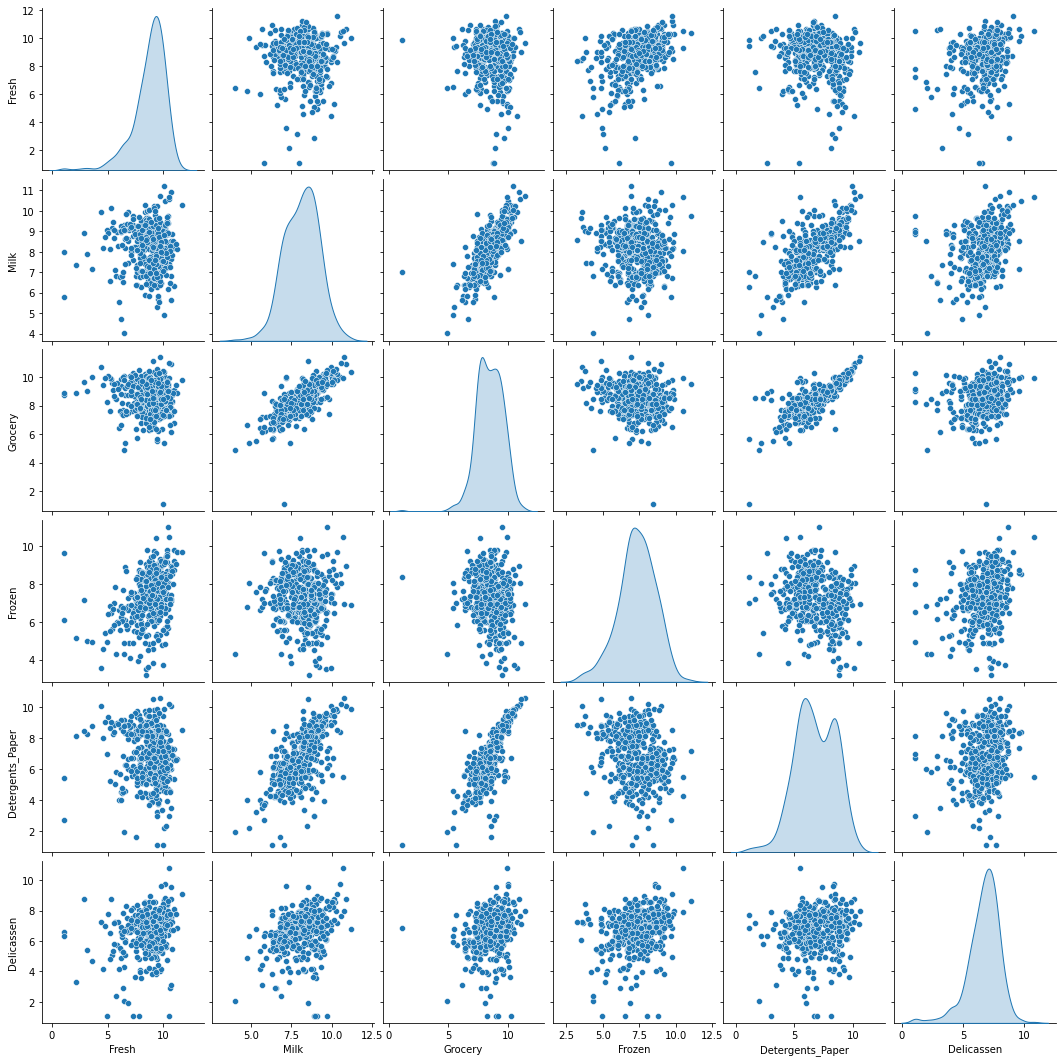

In [130]:
# 1. log transformation
wholesale_log = np.log(wholesale)

sns.pairplot(wholesale_log, diag_kind = 'kde')
plt.show()

# fresh variable is still a little skwed to the left

In [ ]:
"""#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(data) """

In [132]:
# 2. Box-Cox transformation
from scipy import stats

def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

wholesale_boxcox = wholesale.apply(boxcox_df, axis = 0)
wholesale_boxcox

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,51.736919,12.670296,16.694342,6.887991,10.154313,15.470232
1,42.989031,12.699553,17.444169,10.638490,10.494584,16.620941
2,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731
...,...,...,...,...,...,...
435,67.509485,13.082824,19.168372,14.934483,6.131939,17.541051
436,73.578823,9.358068,10.462168,12.552512,5.226444,17.814282
437,54.015018,13.557444,21.453263,8.079721,13.088843,16.830525
438,48.453003,9.892812,13.150498,9.629617,6.022019,17.382819


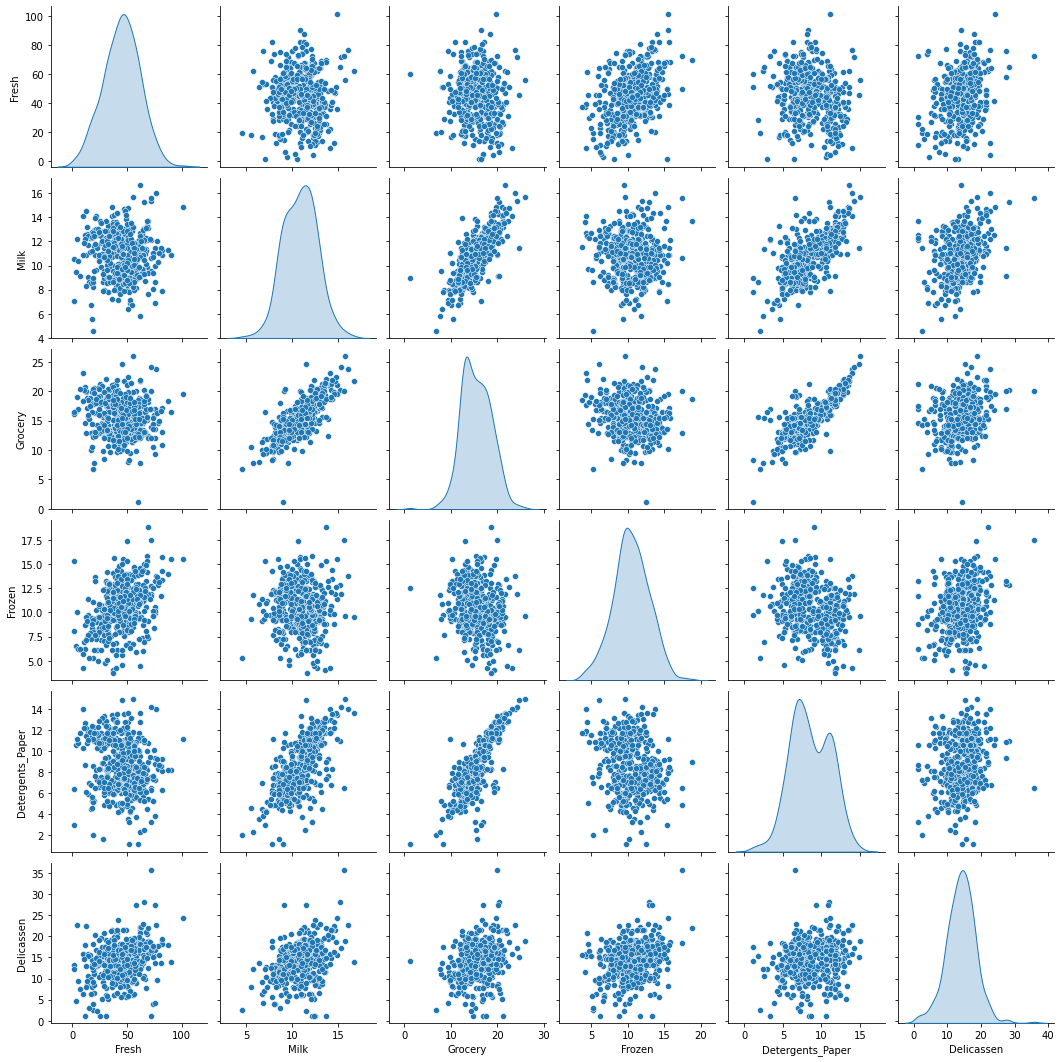

In [133]:
sns.pairplot(wholesale_boxcox, diag_kind = 'kde')
plt.show()

**Scale data for KMeans**
- substract column average from each column value
- divide each column value by column standard deviation
- will use **StandardScaler()** module from **sklearn**

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale_boxcox)
wholesale_scaled = pd.DataFrame(data = wholesale_scaled,
                               index = wholesale_boxcox.index,
                               columns = wholesale_boxcox.columns)
wholesale_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881
...,...,...,...,...,...,...
435,1.357112,1.201976,1.164326,1.839607,-0.935948,0.811050
436,1.720545,-0.808552,-1.550221,0.863813,-1.285593,0.873759
437,0.549059,1.458163,1.876742,-0.968503,1.750367,0.647978
438,0.216004,-0.519911,-0.712014,-0.333575,-0.978393,0.774734


In [137]:
wholesale_scaled.agg(['mean', 'std']).round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


**Build customer and product segmentation**
- build customer segments based on their product purchases

**Segmentation steps with K-means**
- segmentation with K-means (for **k** number of clusters)

In [139]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(wholesale_scaled)
wholesale_kmeans_4 = wholesale.assign(segment = kmeans.labels_)
wholesale_kmeans_4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,2


**Segmentation steps with NMF**
- Segmentation with NMF (**k** number of clusters)
- Extracting segment assignment

In [141]:
# segment wihth NMF
# clustering on the original dataset
from sklearn.decomposition import NMF
nmf = NMF(4)
nmf.fit(wholesale)
components = pd.DataFrame(nmf.components_,
                         columns = wholesale.columns)
components

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,644.386601,0.000000,29.901447,0.000000,0.00000,5.271346
1,1.329201,41.730268,436.532959,3.540971,208.13507,0.000000
2,0.000000,588.637507,50.211677,0.000000,0.00000,93.633675
3,4.227933,0.000000,54.079977,409.829740,0.00000,92.708396


In [144]:
nmf.components_

array([[644.3866008 ,   0.        ,  29.90144748,   0.        ,
          0.        ,   5.27134603],
       [  1.32920085,  41.73026846, 436.53295856,   3.54097102,
        208.13506967,   0.        ],
       [  0.        , 588.63750703,  50.21167712,   0.        ,
          0.        ,  93.633675  ],
       [  4.22793283,   0.        ,  54.07997709, 409.82973989,
          0.        ,  92.70839599]])

In [146]:
segment_weights

,0,1,2,3
0,19.634295,13.930555,15.368602,0.306790
1,10.902878,18.318526,15.374069,4.161790
2,9.831135,14.420520,15.415416,8.750253
3,20.493765,5.432579,1.707513,15.710805
4,35.059381,10.949128,9.291336,11.255828
...,...,...,...,...
435,45.964835,22.690363,18.458637,31.079311
436,60.688533,0.000000,2.390629,10.878215
437,22.372584,66.394703,21.457918,0.180552
438,15.974247,2.702153,3.581814,3.347758


In [151]:
print(segment_weights.idxmax)
print(segment_weights.idxmax(axis = 1))

<bound method DataFrame.idxmax of              0          1          2          3
0    19.634295  13.930555  15.368602   0.306790
1    10.902878  18.318526  15.374069   4.161790
2     9.831135  14.420520  15.415416   8.750253
3    20.493765   5.432579   1.707513  15.710805
4    35.059381  10.949128   9.291336  11.255828
..         ...        ...        ...        ...
435  45.964835  22.690363  18.458637  31.079311
436  60.688533   0.000000   2.390629  10.878215
437  22.372584  66.394703  21.457918   0.180552
438  15.974247   2.702153   3.581814   3.347758
439   4.328848   4.625798   2.532004   0.073964

[440 rows x 4 columns]>
0      0
1      1
2      2
3      0
4      0
      ..
435    0
436    0
437    1
438    0
439    1
Length: 440, dtype: int64


In [143]:
# Extracting segment assignment 
segment_weights = pd.DataFrame(nmf.transform(wholesale), 
                                            columns = components.index)
segment_weights.index = wholesale.index
wholesale_nmf = wholesale.assign(segment = segment_weights.idxmax(axis =1))
wholesale_nmf

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


**How to initialize the number of segments?**
- both KMeans and NMF require **k** value to be set forehand
- two ways to defind **k**: 1) Mathematically 2) Test and learn
- Mathematically: **elbow criterion method** 
    - iterate through a number of **k** values
    - run clustering for each on the same data
    - calculate sum of squared errors (**SSE**) for each
    - plot **SSE** against **k** and identify the 'elbow' - diminishing incremental improvements in error reduction
- **Test and learn method**
    - calculate mathematically optimal number of segments 
    - build segmentation with multiple values around the optimal **k** value 
    - explore the results and choose one with most business relevance (can you name the segments with its charateristics? Are they ambiguous / overlapping?)

In [152]:
# initalize an empty dic called sse
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(wholesale_scaled)
    sse[k] = kmeans.inertia_
sse

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


{1: 2640.0,
 2: 1810.5594127239508,
 3: 1513.370502974405,
 4: 1351.861757982197,
 5: 1240.9661154785686,
 6: 1149.7771508846945,
 7: 1081.9256539215903,
 8: 1031.9733151532475,
 9: 982.1668134089074,
 10: 918.3714154450121}

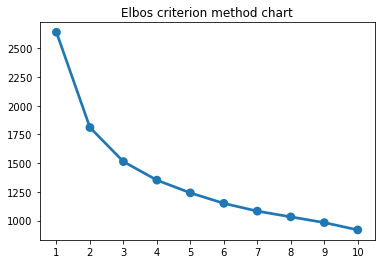

In [153]:
sns.pointplot(x=list(sse.keys()),
             y = list(sse.values()))
plt.title('Elbos criterion method chart')
plt.show()

*The best k value is 3 or 4*

### Visualize and interpret segmentation solutions
#### Methods to explore segments
- calculate average / median / other percentile values for each variable, grouped by each segment
- calculate relative importance for each variable by segment
- explore the data table or plot it (heatmap etc. )

In [155]:
kmeans4_avg = wholesale_kmeans_4.groupby(['segment']).mean().round(0)
kmeans4_avg

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
segment,,,,,,
0,3654.0,6654.0,11413.0,707.0,4731.0,573.0
1,24969.0,4852.0,5024.0,7690.0,844.0,2918.0
2,9766.0,1911.0,2403.0,2312.0,407.0,712.0
3,10452.0,12771.0,17591.0,1968.0,7622.0,2403.0


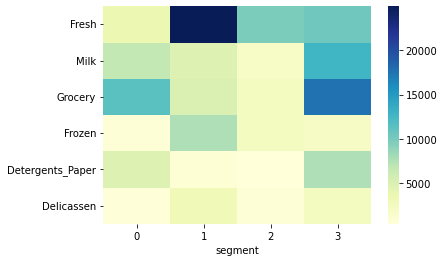

In [159]:
# .T method transpose index or columns 
sns.heatmap(kmeans4_avg.T,
           cmap = 'YlGnBu')
plt.show()

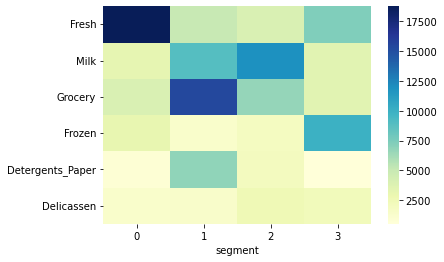

In [161]:
nmf4_avg = wholesale_nmf.groupby(['segment']).mean().round(0)
sns.heatmap(nmf4_avg.T, cmap = 'YlGnBu')
plt.show()